<a href="https://colab.research.google.com/github/bikku4542/credit_card_fraud_Detection/blob/main/Credit_Card_Fraud_Detection_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [6]:
#Loading a Dataset to a panda dataframe
credit_card_data=pd.read_csv('/content/creditcard.csv')

In [7]:
#Printing the First 5 rows of the DataSet
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
credit_card_data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49605,44132,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,...,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,79.00,0.0
49606,44132,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,...,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,40.00,0.0
49607,44133,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,...,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,108.00,0.0
49608,44134,-0.262018,0.851831,1.459865,1.057694,-0.725526,0.274325,1.750817,-1.097029,0.439934,...,-0.272138,0.032569,-0.141121,0.476174,-0.587678,0.288669,-0.914934,-0.676786,172.82,0.0
49609,44135,-4.719790,-4.249875,1.850000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dataset Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49610 entries, 0 to 49609
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    49610 non-null  int64  
 1   V1      49610 non-null  float64
 2   V2      49610 non-null  float64
 3   V3      49610 non-null  float64
 4   V4      49609 non-null  float64
 5   V5      49609 non-null  float64
 6   V6      49609 non-null  float64
 7   V7      49609 non-null  float64
 8   V8      49609 non-null  float64
 9   V9      49609 non-null  float64
 10  V10     49609 non-null  float64
 11  V11     49609 non-null  float64
 12  V12     49609 non-null  float64
 13  V13     49609 non-null  float64
 14  V14     49609 non-null  float64
 15  V15     49609 non-null  float64
 16  V16     49609 non-null  float64
 17  V17     49609 non-null  float64
 18  V18     49609 non-null  float64
 19  V19     49609 non-null  float64
 20  V20     49609 non-null  float64
 21  V21     49609 non-null  float64
 22

In [10]:
# Checking the Missing Values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [11]:
# Distribution of legit Transaction & Fraudlent Transaction
credit_card_data['Class'].value_counts()

,count
Class,
0.0,49461
1.0,148


This DataSet is highly Unbalanced


0 ---> Normal Transaction

1 --->Fraudulent Transaction

In [12]:
#Seperating the data for Analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [13]:
print(legit.shape)
print(fraud.shape)

(49461, 31)
(148, 31)


In [14]:
#statistical Measures of the Data
legit.Amount.describe()

,Amount
count,49461.000000
mean,93.099593
std,253.325102
min,0.000000
25%,7.680000
50%,25.000000
75%,85.000000
max,12910.930000


In [15]:
fraud.Amount.describe()

,Amount
count,148.000000
mean,100.170676
std,233.347471
min,0.000000
25%,1.000000
50%,9.560000
75%,99.990000
max,1809.680000


In [16]:
# compare the values for both Transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28809.010473,-0.220239,-0.003947,0.726173,0.167967,-0.240785,0.111250,-0.096470,0.042413,0.134593,...,0.046113,-0.031134,-0.106800,-0.039391,0.008275,0.135623,0.020410,0.003001,0.004455,93.099593
1.0,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.470319,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676


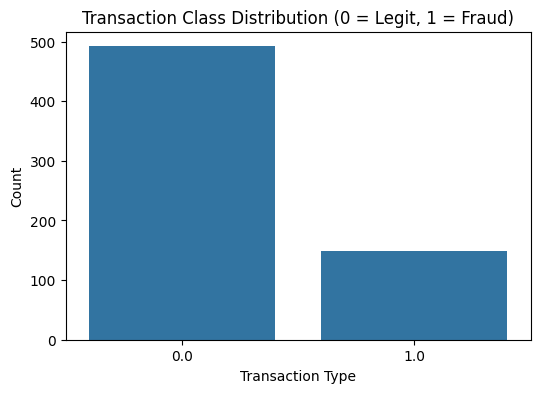

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=new_dataset)
plt.title("Transaction Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


Under-Sampling


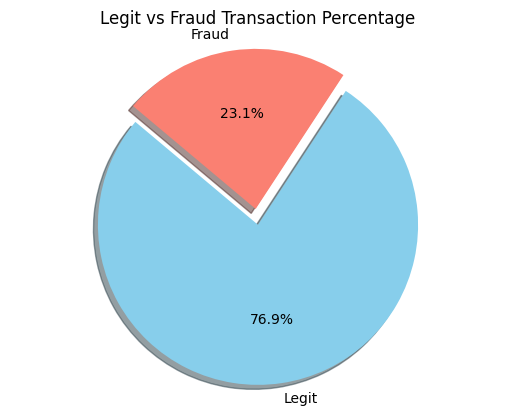

In [40]:
labels = ['Legit', 'Fraud']
sizes = new_dataset['Class'].value_counts()
colors = ['skyblue', 'salmon']
explode = (0, 0.1)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Legit vs Fraud Transaction Percentage")
plt.axis('equal')
plt.show()


Build a simple dataset containing similar distribution of normal transaction and Fraudulent Transactions


Number of Fraudulent Transactions --->492


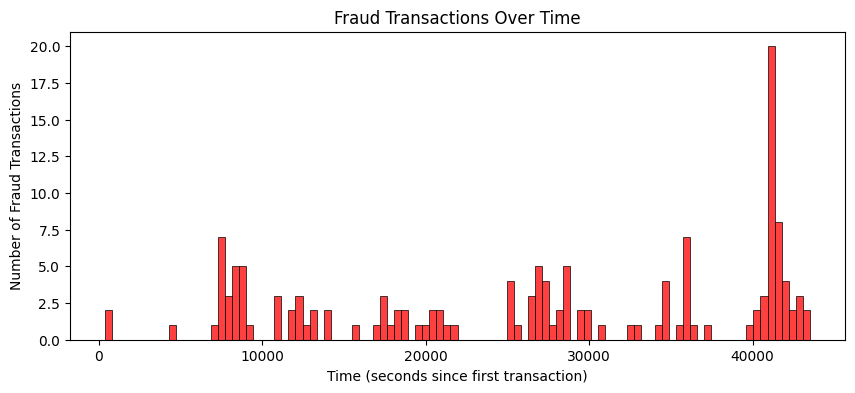

In [41]:
plt.figure(figsize=(10,4))
sns.histplot(fraud['Time'], bins=100, color='red')
plt.title("Fraud Transactions Over Time")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Number of Fraud Transactions")
plt.show()


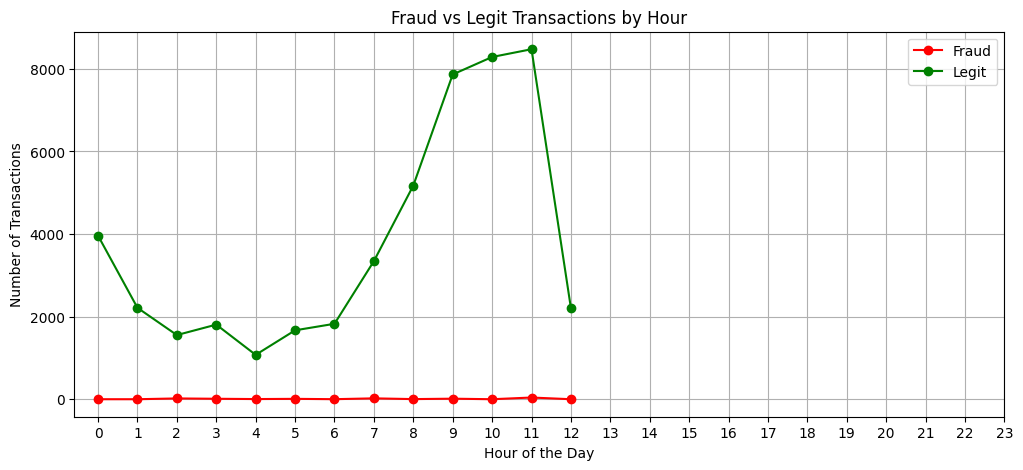

In [42]:
credit_card_data['Hour'] = (credit_card_data['Time'] // 3600) % 24
fraud_hourly = credit_card_data[credit_card_data['Class'] == 1]['Hour'].value_counts().sort_index()
legit_hourly = credit_card_data[credit_card_data['Class'] == 0]['Hour'].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(fraud_hourly.index, fraud_hourly.values, label='Fraud', color='red', marker='o')
plt.plot(legit_hourly.index, legit_hourly.values, label='Legit', color='green', marker='o')
plt.xticks(range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Fraud vs Legit Transactions by Hour')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [18]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)  #For adding row-wise

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22291,32152,-0.777976,0.569215,1.818423,-1.239836,0.256591,-0.548354,0.728522,-0.124655,-0.212543,...,0.088404,0.204539,-0.461433,0.046661,0.329726,0.997183,-0.381147,-0.190207,2.99,0.0
17311,28622,1.257794,0.315784,0.292934,0.697089,-0.418983,-1.083981,0.047131,-0.171081,0.118810,...,-0.294959,-0.876924,0.136197,0.324249,0.197919,0.096732,-0.026636,0.029412,0.99,0.0
17647,28838,1.333810,-0.970313,1.195942,-0.795798,-1.735769,-0.059194,-1.575794,0.324830,-0.098506,...,0.440546,1.103669,-0.109036,-0.002434,0.260122,-0.032650,0.040381,0.015066,9.99,0.0
17505,28777,1.189052,0.125410,-0.109721,0.373923,-0.053437,-0.747913,0.332656,-0.139765,-0.357527,...,-0.335833,-1.147394,0.065745,-0.020280,0.269275,0.138952,-0.078459,0.001599,44.90,0.0
30124,35782,-0.142484,0.233260,1.244344,-0.971559,-0.119358,-0.008572,0.055951,0.127522,-1.877778,...,-0.115426,-0.507439,0.115021,-0.350990,-0.684773,-0.535514,0.146318,0.129136,13.00,0.0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46909,42985,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00,1.0
46918,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1.0
46998,43028,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1.0
47802,43369,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1.0
48094,43494,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,24.90,1.0


In [21]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,148


In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,29130.359756,-0.363537,-0.006659,0.573221,0.104410,-0.218877,0.084495,-0.139627,0.016177,0.178268,...,0.031985,-0.085555,-0.110931,-0.045105,0.046442,0.150692,0.022701,0.010227,0.020964,91.875264
1.0,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.470319,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676


Splitting the Data into Features and Targets

In [23]:
X=new_dataset.drop(columns='Class',axis=1) #Axis=1 Represent Columns
Y=new_dataset['Class']

In [24]:
print(X)


        Time        V1        V2        V3        V4        V5        V6  \
22291  32152 -0.777976  0.569215  1.818423 -1.239836  0.256591 -0.548354   
17311  28622  1.257794  0.315784  0.292934  0.697089 -0.418983 -1.083981   
17647  28838  1.333810 -0.970313  1.195942 -0.795798 -1.735769 -0.059194   
17505  28777  1.189052  0.125410 -0.109721  0.373923 -0.053437 -0.747913   
30124  35782 -0.142484  0.233260  1.244344 -0.971559 -0.119358 -0.008572   
...      ...       ...       ...       ...       ...       ...       ...   
46909  42985 -4.075975  0.963031 -5.076070  4.955963 -0.161437 -2.832663   
46918  42988 -4.423508  1.648048 -6.934388  4.894601 -5.078131  0.010849   
46998  43028 -1.109646  0.811069 -1.138135  0.935265 -2.330248 -0.116106   
47802  43369 -3.365319  2.426503 -3.752227  0.276017 -2.305870 -1.961578   
48094  43494 -1.278138  0.716242 -1.143279  0.217805 -1.293890 -1.168952   

             V7        V8        V9  ...       V20       V21       V22  \
22291  0.7285

In [25]:
print(Y)

22291    0.0
17311    0.0
17647    0.0
17505    0.0
30124    0.0
        ... 
46909    1.0
46918    1.0
46998    1.0
47802    1.0
48094    1.0
Name: Class, Length: 640, dtype: float64


Splitting the Data into Training Data and Testing Data

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [27]:
print(  X.shape,X_train.shape,X_test.shape)

(640, 30) (512, 30) (128, 30)


Model Training

Logistic Regression

In [31]:
model=LogisticRegression(max_iter=10000)

In [32]:
#training the Logistic Regression Model with Training Data
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [46]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')  # You can also try 'rbf'
svm_model.fit(X_train, Y_train)

# Predictions and Accuracy
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(svm_predictions, Y_test)
print("SVM Model Accuracy:", svm_accuracy)


SVM Model Accuracy: 0.9609375


In [47]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predictions and Accuracy
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(rf_predictions, Y_test)
print("Random Forest Model Accuracy:", rf_accuracy)


Random Forest Model Accuracy: 0.9765625


Model Evaluation

Accuracy Score


In [33]:
#Accuracy on Training Data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [34]:
print('Accuracy on Training Data :',training_data_accuracy)

Accuracy on Training Data : 0.98828125


In [35]:
# Accuracy on Test Data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [36]:
print('Accuracy score on Test Data :',test_data_accuracy)

Accuracy score on Test Data : 0.96875


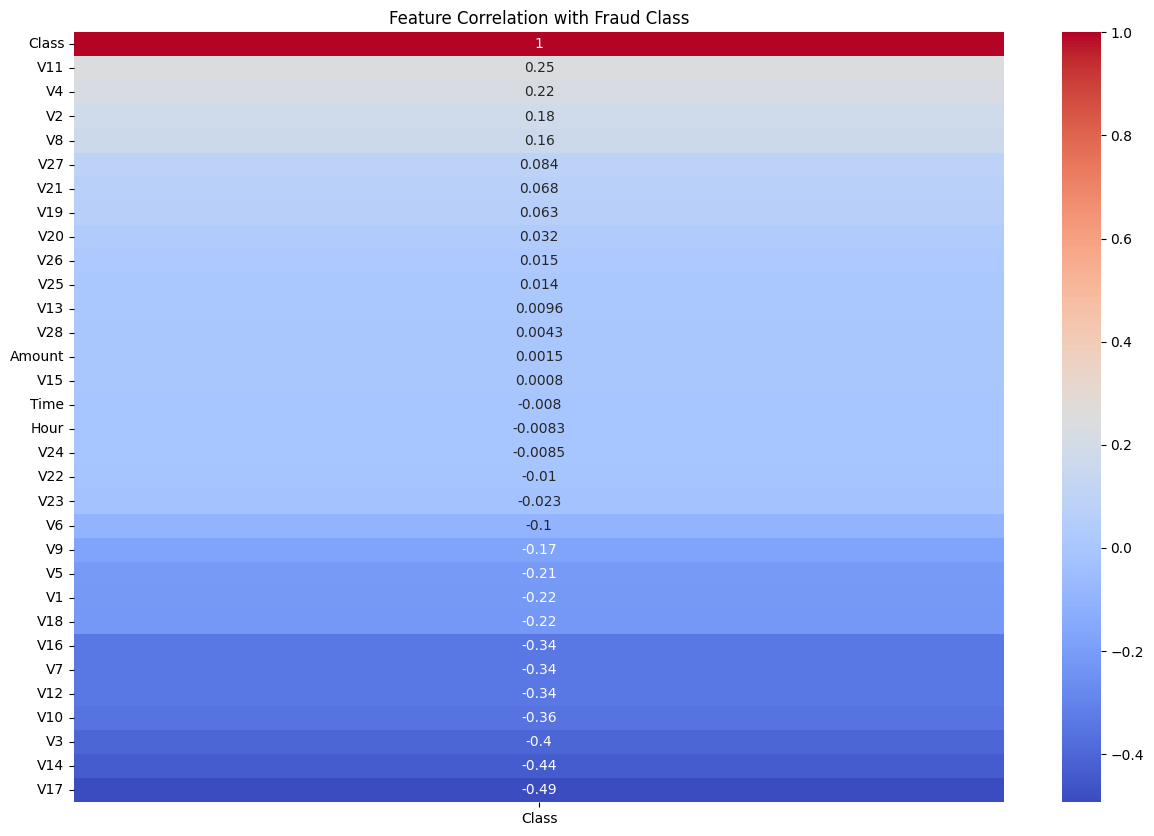

In [43]:
plt.figure(figsize=(15,10))
corr = credit_card_data.corr()
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Fraud Class")
plt.show()


Accuracy Score of Different Models


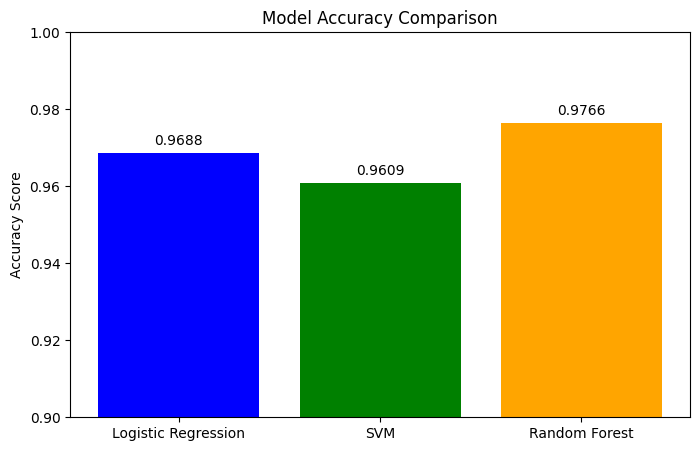

In [48]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [test_data_accuracy, svm_accuracy, rf_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0.90, 1.0)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f"{acc:.4f}", ha='center')
plt.show()

